# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


In [1]:
# Importacion de librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest


# Limpieza y preparacion de datos para el análisis

In [2]:
datos= pd.read_csv('/datasets/logs_exp_us.csv',sep="\t")
datos

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [3]:
# Se cambio el nombre de las columnas.
datos.rename(columns={'EventName': 'evento', 'DeviceIDHash':'id de usuario','EventTimestamp':'fecha y hora','ExpId':'experimento'}, inplace=True)

# Se cambio los tipos de datos a su tipo correcto.
datos['id de usuario']=datos['id de usuario'].astype('object')
datos['experimento']=datos['experimento'].astype('object')
datos['fecha y hora']=pd.to_datetime(datos['fecha y hora'],unit='s')

# Se agrego una columna de fecha y hora y una columna separada para las fechas.
datos['fecha']=datos['fecha y hora'].dt.date
datos['fecha']=pd.to_datetime(datos['fecha'])

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   evento         244126 non-null  object        
 1   id de usuario  244126 non-null  object        
 2   fecha y hora   244126 non-null  datetime64[ns]
 3   experimento    244126 non-null  object        
 4   fecha          244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 9.3+ MB


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente organización en esta etapa inicial. Has aplicado correctamente la carga de datos, el renombrado de columnas y la conversión de tipos, lo que refleja una comprensión sólida del preprocesamiento en Pandas. Tu estructura facilita un análisis limpio y eficiente.  
</div>


# Estudio y Comprobacion de datos

**¿Cuántos eventos hay en los registros?**

Hay 244,126 eventos en total en los datos

In [4]:
datos['evento'].value_counts().sum()

244126

**¿Cuántos usuarios hay en los registros?**

Hay 7,551 usuarios en los datos

In [5]:
datos['id de usuario'].nunique()

7551

**¿Cuál es el promedio de eventos por usuario?**

Los usuarios tienen 32 eventos en promedio

In [6]:
datos.groupby('id de usuario')['evento'].count().mean()

32.33028737915508

**¿Qué periodo de tiempo cubren los datos?**

Va desde 25 de julio hasta 07 de agosto

**¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?**

Como se muestra en el primer histograma, en los primeros dias no hay muchos eventos, esto puede ser por razones tecnicas.

Se encuentra que a partir del 1 de agosto los datos comienzan a estar completos (se normalizan)

**¿Qué periodo representan realmente los datos?**

Realmente los datos van desde 01 de agosto hasta 07 de agost (1 semana)


2019-08-07 21:15:17
2019-07-25 04:43:36


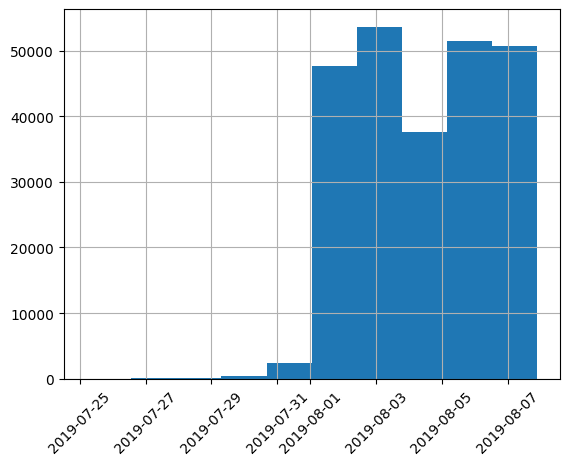

In [7]:
print(datos['fecha y hora'].max())
print(datos['fecha y hora'].min())
datos['fecha y hora'].hist()
plt.xticks(rotation=45) 
plt.show()

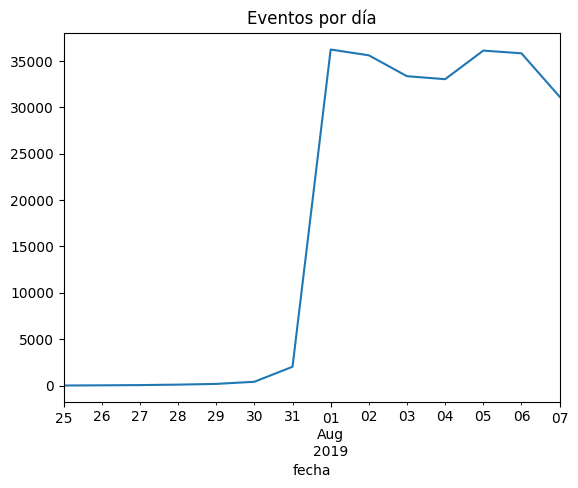

In [8]:
eventos_por_dia = datos.groupby('fecha')['evento'].count()
eventos_por_dia.plot(kind='line')
plt.title('Eventos por día')
plt.show()

In [9]:
eventos_por_dia

fecha
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: evento, dtype: int64

2019-08-07 21:15:17
2019-08-01 00:07:28


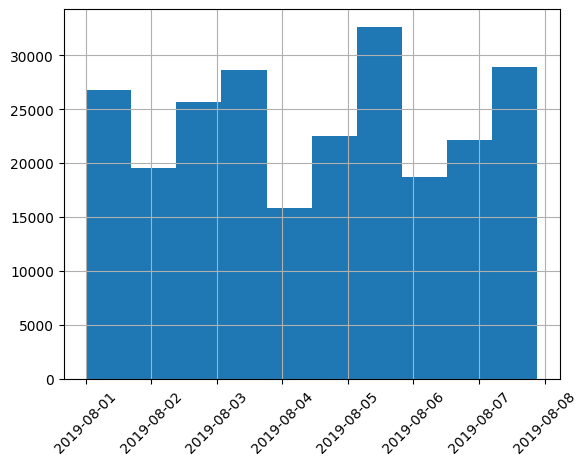

In [10]:
datos_filtrados = datos[datos['fecha y hora'] >= pd.to_datetime('2019-08-01')]
print(datos_filtrados['fecha y hora'].max())
print(datos_filtrados['fecha y hora'].min())
datos_filtrados['fecha y hora'].hist()
plt.xticks(rotation=45) 
plt.show()

**¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?**

Con los datos antiguos eran  7,551 usuarios y 244,126 eventos, ahora con los datos filtrados hay 7,534 usuarios y 241,298 eventos, osea se perdieron 17 usuarios y 2,828 eventos.

Para la cantidad de usuarios y eventos que tenemos no se considera mucha la diferencia.

In [11]:
total_usuarios= datos_filtrados['id de usuario'].nunique()
print("Usuarios=",total_usuarios)
print("")
total_eventos= datos_filtrados['evento'].value_counts().sum()
print("Eventos=",total_eventos)

Usuarios= 7534

Eventos= 241298


**Asegúrate de tener usuarios de los tres grupos experimentales.**

Podemos observar en la siguente linea de codigo que si tenemos usuarios en las tres grupos experimentales.

In [12]:
datos_filtrados['experimento'].value_counts()

248    84726
246    79425
247    77147
Name: experimento, dtype: int64

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en el estudio exploratorio. Has validado correctamente la integridad temporal de los datos, identificado el periodo útil para el análisis y confirmado la distribución equilibrada entre grupos experimentales. La interpretación de resultados es clara y consistente con los cálculos realizados.  
</div>


# Estudio del embudo de eventos

**Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.**

In [13]:
datos_filtrados['evento'].value_counts()

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: evento, dtype: int64

**Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.**

In [14]:
eventos_por_usuario = datos_filtrados.groupby('evento')['id de usuario'].nunique().reset_index()
eventos_por_usuario = eventos_por_usuario.sort_values(by='id de usuario', ascending=False)
eventos_por_usuario['proporcion'] = (eventos_por_usuario['id de usuario'] / total_usuarios)*100


eventos_por_usuario

,evento,id de usuario,proporcion
1,MainScreenAppear,7419,98.473586
2,OffersScreenAppear,4593,60.963632
0,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


**¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.**

Yo creo que para un usuario la secuencia normal seria  MainScreenAppear-->OffersScreenAppear --> CartScreenAppear-->PaymentScreenSuccessful, el evento Tutorial no entraria parte de la secuencia.

**Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.**

In [15]:
proporcion_etapa_1=(datos_filtrados[datos_filtrados['evento']=='OffersScreenAppear']['id de usuario'].nunique()/datos_filtrados[datos_filtrados['evento']=='MainScreenAppear']['id de usuario'].nunique())*100
proporcion_etapa_2=(datos_filtrados[datos_filtrados['evento']=='CartScreenAppear']['id de usuario'].nunique()/datos_filtrados[datos_filtrados['evento']=='OffersScreenAppear']['id de usuario'].nunique())*100
proporcion_etapa_3=(datos_filtrados[datos_filtrados['evento']=='PaymentScreenSuccessful']['id de usuario'].nunique()/datos_filtrados[datos_filtrados['evento']=='CartScreenAppear']['id de usuario'].nunique())*100
print("De MainScreenAppear a OffersScreenAppear=",f"{proporcion_etapa_1:.2f}%")
print("De OffersScreenAppear a CartScreenAppear=",f"{proporcion_etapa_2:.2f}%")
print("De CartScreenAppear a PaymentScreenSuccessful=",f"{proporcion_etapa_3:.2f}%")

De MainScreenAppear a OffersScreenAppear= 61.91%
De OffersScreenAppear a CartScreenAppear= 81.30%
De CartScreenAppear a PaymentScreenSuccessful= 94.78%


**¿En qué etapa pierdes más usuarios?**

Como es de esperarse la etapa en donde se pierden mas usuarios es de la pantalla principal a la oferta del producto, puede ser por varias razones como por ejemplo que no le haya gustado nada de lo que vio, solamente estaba viendo que productos hay sin querer comprar nada, etc.

**¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?**

Los usuarios que hicieron todos los eventos fue un 47.70%

In [16]:
usuarios_etapa_completa = (datos_filtrados[datos_filtrados['evento']=='PaymentScreenSuccessful']['id de usuario'].nunique()/datos_filtrados[datos_filtrados['evento']=='MainScreenAppear']['id de usuario'].nunique())*100
print(f"Usuarios que completan todo la secuencia hasta el pago: {usuarios_etapa_completa:.2f}%")

Usuarios que completan todo la secuencia hasta el pago: 47.70%


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen análisis del embudo. Identificaste con claridad la secuencia lógica de eventos, calculaste correctamente las tasas de conversión entre etapas y proporcionaste una interpretación coherente sobre la pérdida de usuarios. Tu razonamiento muestra una comprensión sólida del comportamiento del usuario dentro del flujo.  
</div>


# Estudio de los resultados del experimento

**¿Cuántos usuarios hay en cada grupo?**

Para el experimento 248 hay *84,726* usuarios, para el experimento 246 hay *79,425* usuarios y para el experimento 247 hay *77,147* usuarios

In [17]:
datos_filtrados['experimento'].value_counts()

248    84726
246    79425
247    77147
Name: experimento, dtype: int64

**Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.**

Los resultados mostraron que no hay diferencias significativas entre las muestras de los dos grupos comparados.

In [18]:
# Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
grupo_246= datos_filtrados[datos_filtrados['experimento']==246]
grupo_247= datos_filtrados[datos_filtrados['experimento']==247]

grupo_246_counts = grupo_246['evento'].value_counts()
grupo_247_counts = grupo_247['evento'].value_counts()

alpha = .05 #nivel de significación

results = st.mannwhitneyu(grupo_246_counts, grupo_247_counts)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los dos grupos comparados")
else:
    print("No existen diferencias significativas entre las muestras de los dos grupos comparados")

p-value:  1.0
No existen diferencias significativas entre las muestras de los dos grupos comparados


**Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?**

Se comprobaron todas las proporciones para todos los eventos en los dos grupos  y en todas las pruebas resulto que no existen diferencias significativas entre las distribuciones de los dos grupos, por lo tanto si se puede confirmar que los grupos se dividieron correctamente.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente validación estadística. Has aplicado correctamente la prueba de Mann-Whitney para comparar los grupos de control y confirmado con evidencia que no existen diferencias significativas. Tu razonamiento demuestra comprensión de los fundamentos del test A/A y de la importancia de la consistencia experimental.  
</div>


In [19]:

# Procedimiento para comparar las proporciones para solamente un evento de dos grupos
"""
grupo_246_MainScreenAppear= grupo_246[grupo_246['evento']=='MainScreenAppear']
grupo_247_MainScreenAppear= grupo_247[grupo_247['evento']=='MainScreenAppear']  

# Usuarios que hicieron MainScreenAppear
grupo_246_MainScreenAppear_usuarios = grupo_246_MainScreenAppear['id de usuario'].nunique()
grupo_247_MainScreenAppear_usuarios = grupo_247_MainScreenAppear['id de usuario'].nunique()

# Usuarios únicos totales por grupo
total_usuarios_246 = grupo_246['id de usuario'].nunique()
total_usuarios_247 = grupo_247['id de usuario'].nunique()

grupo_246_MainScreenAppear_proporcion = grupo_246_MainScreenAppear_usuarios/total_usuarios_246
grupo_247_MainScreenAppear_proporcion = grupo_247_MainScreenAppear_usuarios/total_usuarios_247

alpha = .05 #nivel de significación

# Datos para el test
count = [grupo_246_MainScreenAppear_usuarios, grupo_247_MainScreenAppear_usuarios]
nobs = [total_usuarios_246, total_usuarios_247]

# # Test de proporciones
# z_stat, p_value = proportions_ztest(count, nobs)

# print('p-value: ', p_value)

# if (p_value < alpha):
#     print("Existen diferencias significativas entre las distribuciones de los dos grupos comparados")
# else:
#     print("No existen diferencias significativas entre las distribuciones de los dos grupos comparados")
"""

"""
grupo_246_MainScreenAppear= grupo_246[grupo_246['evento']=='MainScreenAppear']
grupo_247_MainScreenAppear= grupo_247[grupo_247['evento']=='MainScreenAppear']

# Usuarios que hicieron MainScreenAppear
grupo_246_MainScreenAppear_usuarios = grupo_246_MainScreenAppear['id de usuario'].nunique()
grupo_247_MainScreenAppear_usuarios = grupo_247_MainScreenAppear['id de usuario'].nunique()

# Usuarios únicos totales por grupo
total_usuarios_246 = grupo_246['id de usuario'].nunique()
total_usuarios_247 = grupo_247['id de usuario'].nunique()

grupo_246_MainScreenAppear_proporcion = grupo_246_MainScreenAppear_usuarios/total_usuarios_246
grupo_247_MainScreenAppear_proporcion = grupo_247_MainScreenAppear_usuarios/total_usuarios_247

alpha = .05 #nivel de significación

# Datos para el test
count = [grupo_246_MainScreenAppear_usuarios, grupo_247_MainScreenAppear_usuarios]
nobs = [total_usuarios_246, total_usuarios_247]

# # Test de proporciones
# z_stat, p_value = proportions_ztest(count, nobs)

# print('p-value: ', p_value)

# if (p_value < alpha):
#     print("Existen diferencias significativas entre las distribuciones de los dos grupos comparados")
# else:
#     print("No existen diferencias significativas entre las distribuciones de los dos grupos comparados")
"""

# Función para comparar proporciones de un evento entre dos grupos
def comparar_proporciones(evento, grupo1, grupo2):
    grupo1_evento = grupo1[grupo1['evento'] == evento]
    grupo2_evento = grupo2[grupo2['evento'] == evento]

    grupo1_usuarios = grupo1_evento['id de usuario'].nunique()
    grupo2_usuarios = grupo2_evento['id de usuario'].nunique()

    # Usuarios únicos totales por grupo
    total_usuarios_grupo1 = grupo1['id de usuario'].nunique()
    total_usuarios_grupo2 = grupo2['id de usuario'].nunique()


    proporcion_grupo1 = grupo1_usuarios / total_usuarios_grupo1
    proporcion_grupo2 = grupo2_usuarios / total_usuarios_grupo2

    alpha = .05 #nivel de significación

    # Datos para el test
    count = [grupo1_usuarios, grupo2_usuarios]
    nobs = [total_usuarios_grupo1, total_usuarios_grupo2]

    # Test de proporciones
    z_stat, p_value = proportions_ztest(count, nobs)

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Existen diferencias significativas entre las distribuciones de los dos grupos comparados")
    else:
        print("No existen diferencias significativas entre las distribuciones de los dos grupos comparados")

    return p_value

eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
           'PaymentScreenSuccessful', 'Tutorial']

for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones(evento, grupo_246, grupo_247)






--- Análisis para MainScreenAppear ---
p-value:  0.7570597232046099
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.2480954578522181
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.22883372237997213
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.11456679313141847
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.9376996189257114
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


**Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?**

Segun los resultados obtenidos el experimento 248(fuentes alteradas) NO tuvieron impacto significativo en el comportamiento de los usuarios. No hubo cambios significativos con la comparacion de los experimentos de control contra el experimento de prueba y tampoco con los experimentos de control combinados contra el experimento de prueba.

Como recomendacion diria que el experimento 248 se acabara e intentaran probar cambios más significativos en el diseño de la aplicacion.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación del test de proporciones y comparación de resultados experimentales. Has demostrado dominio en la validación de hipótesis y en la interpretación estadística de los resultados, concluyendo de forma coherente la ausencia de impacto del cambio experimental. La recomendación final es pertinente y muestra criterio analítico.  
</div>


In [20]:
# Grupo 248 vs Grupo 246 (para cada evento)
grupo_248= datos_filtrados[datos_filtrados['experimento']==248]

for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones(evento, grupo_248, grupo_246)



--- Análisis para MainScreenAppear ---
p-value:  0.2949721933554553
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.20836205402738917
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.07842923237520125
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.21225532756977972
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.8264294010087645
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


In [21]:

# Grupo 248 vs Grupo 247 (para cada evento)
for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones(evento, grupo_248, grupo_247)



--- Análisis para MainScreenAppear ---
p-value:  0.45870536166215137
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.919781783059226
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.5786197879539782
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.7373415053803964
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.7653239224745011
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


In [22]:
# Grupo 248 vs Grupos (246 + 247) combinados
grupo_control_combinado = pd.concat([grupo_246, grupo_247])



for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones(evento, grupo_248, grupo_control_combinado)



--- Análisis para MainScreenAppear ---
p-value:  0.29424526837179577
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.43425549655188245
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.18175875284404386
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.6004294282308703
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.764862472531507
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


**¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.**

Para probar las hipotesis estadisticas anterior mente he usado un nivel de significancia de 0.05.
Para el test A/A hice 5 pruebas y para el test A/B hice 15 pruebas, en total hice 20 pruebas.

Cuando haces muchas pruebas tiende a que pueda salir un falso positivo y para corregir esto se usa la correcion de Bonferroni.

Como era de esperarse, con el nuevo nivel de significancia los resultados fueron los mismos,  si con un nivel de significancia de 0.05 no obtuvimos ninguna diferencia significativa menos con un nivel de significancia de 0.0025. 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente interpretación del análisis estadístico. Has considerado correctamente el efecto de realizar múltiples pruebas y aplicado el ajuste de Bonferroni de forma adecuada. Tu razonamiento sobre los niveles de significancia y la confirmación de resultados refuerzan la validez de tus conclusiones. Trabajo muy sólido y metódico.  
</div>


In [23]:
# Nuevo nivel de signigicancia
alpha_original = 0.05
numero_pruebas = 20
alpha_bonferroni = alpha_original / numero_pruebas
print(f"Nuevo α = {alpha_bonferroni:.4f}")

Nuevo α = 0.0025


In [24]:
# Test A/A (246 vs 247)
def comparar_proporciones_bonferroni(evento,grupo1, grupo2):
    grupo1_evento = grupo1[grupo1['evento'] == evento]
    grupo2_evento = grupo2[grupo2['evento'] == evento]

    grupo1_usuarios = grupo1_evento['id de usuario'].nunique()
    grupo2_usuarios = grupo2_evento['id de usuario'].nunique()

    # Usuarios únicos totales por grupo
    total_usuarios_grupo1 = grupo1['id de usuario'].nunique()
    total_usuarios_grupo2 = grupo2['id de usuario'].nunique()


    proporcion_grupo1 = grupo1_usuarios / total_usuarios_grupo1
    proporcion_grupo2 = grupo2_usuarios / total_usuarios_grupo2

    alpha = 0.0025 #nivel de significación

    # Datos para el test
    count = [grupo1_usuarios, grupo2_usuarios]
    nobs = [total_usuarios_grupo1, total_usuarios_grupo2]

    # Test de proporciones
    z_stat, p_value = proportions_ztest(count, nobs)

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Existen diferencias significativas entre las distribuciones de los dos grupos comparados")
    else:
        print("No existen diferencias significativas entre las distribuciones de los dos grupos comparados")

    return p_value

eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear',
           'PaymentScreenSuccessful', 'Tutorial']

for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones_bonferroni(evento, grupo_246, grupo_247)


--- Análisis para MainScreenAppear ---
p-value:  0.7570597232046099
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.2480954578522181
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.22883372237997213
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.11456679313141847
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.9376996189257114
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente aplicación de la corrección de Bonferroni. Ajustaste correctamente el nivel de significancia y verificaste su impacto en los resultados, mostrando comprensión del control de error tipo I en análisis con múltiples comparaciones. Tu procedimiento es riguroso y refuerza la validez estadística del experimento.  
</div>


In [25]:
# Test A/B individuales (248 vs 246, 248 vs 247)
for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones_bonferroni(evento, grupo_248, grupo_246)

print("------------")

for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones_bonferroni(evento, grupo_248, grupo_247)


--- Análisis para MainScreenAppear ---
p-value:  0.2949721933554553
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.20836205402738917
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.07842923237520125
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.21225532756977972
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.8264294010087645
No existen diferencias significativas entre las distribuciones de los dos grupos comparados
------------

--- Análisis para MainScreenAppear ---
p-value:  0.45870536166215137
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis pa

In [26]:
# Test A/B combinado (248 vs 246+247)
for evento in eventos:
    print(f"\n--- Análisis para {evento} ---")
    p_value = comparar_proporciones_bonferroni(evento, grupo_248, grupo_control_combinado)



--- Análisis para MainScreenAppear ---
p-value:  0.29424526837179577
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para OffersScreenAppear ---
p-value:  0.43425549655188245
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para CartScreenAppear ---
p-value:  0.18175875284404386
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para PaymentScreenSuccessful ---
p-value:  0.6004294282308703
No existen diferencias significativas entre las distribuciones de los dos grupos comparados

--- Análisis para Tutorial ---
p-value:  0.764862472531507
No existen diferencias significativas entre las distribuciones de los dos grupos comparados


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Has completado un análisis estadístico impecable, aplicando correctamente la corrección de Bonferroni en los tests A/B y combinados. La consistencia en los resultados y tu interpretación final confirman un manejo sólido de la inferencia estadística y la comparación entre grupos experimentales. Excelente precisión metodológica.  
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a> 
    
Este proyecto destaca por su estructura clara y por la rigurosidad con que abordas el análisis experimental, desde la preparación de los datos hasta la validación estadística final. Tu trabajo demuestra dominio tanto de las herramientas de **Pandas** como de las pruebas de hipótesis en contextos A/A y A/B.  

### Fortalezas del proyecto:

* **Preparación y limpieza de datos:** Precisa y bien documentada, asegurando la consistencia del conjunto de datos antes del análisis.
  
* **Análisis exploratorio:** Correcta identificación del rango temporal, distribución de eventos y comportamiento de los usuarios.

  
* **Embudo de conversión:** Cálculos y conclusiones coherentes, interpretando adecuadamente la pérdida de usuarios entre etapas.

  
* **Evaluación estadística:** Aplicación impecable de pruebas de hipótesis, incluyendo la **corrección de Bonferroni**, con una interpretación sólida y alineada con el método científico.

El proyecto cumple con los criterios y refleja comprensión tanto del proceso analítico como del razonamiento estadístico detrás de cada decisión. Has logrado construir un flujo de trabajo claro, reproducible y fundamentado. Tu enfoque sistemático y crítico es una excelente base para futuros experimentos con mayor complejidad.

</div>
